<a href="https://colab.research.google.com/github/narender5162/Project-Data-science-imp/blob/main/Project_Data_Science_impo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing file

In [ ]:
# importing data set and loading using encoding
file_path = '/content/drive/MyDrive/international-visitors-london-raw.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
# Display the first few rows
print (df.head())

   year        quarter   market     dur_stay mode        purpose     area  \
0  2002  January-March  Belgium  1-3  nights  Air        Holiday   LONDON   
1  2002  January-March  Belgium  1-3  nights  Air       Business   LONDON   
2  2002  January-March  Belgium  1-3  nights  Air            VFR   LONDON   
3  2002  January-March  Belgium  1-3  nights  Air  Miscellaneous   LONDON   
4  2002  January-March  Belgium  1-3  nights  Sea       Business   LONDON   

   Visits (000s)  Spend (£m)  Nights (000s)  sample  
0       3.572186    0.969138       6.954456       5  
1       9.284226    2.399577      12.604959      19  
2       0.877182    0.089833       2.153128       3  
3       0.163874    0.010160       0.163874       1  
4       1.648670    0.016789       1.650300       1  


In [ ]:
# Display the last few rows
print(df.tail())


        year        quarter        market     dur_stay mode        purpose  \
61457  2020P  January-March  Other Africa  4-7  nights  Air  Miscellaneous   
61458  2020P  January-March  Other Africa  8-14 nights  Air        Holiday   
61459  2020P  January-March  Other Africa  8-14 nights  Air            VFR   
61460  2020P  January-March  Other Africa  15+  nights  Air        Holiday   
61461  2020P  January-March  Other Africa  15+  nights  Air            VFR   

          area  Visits (000s)  Spend (£m)  Nights (000s)  sample  
61457   LONDON       1.695331    1.103167       8.831038       2  
61458   LONDON       1.486972    2.022254       7.836555       1  
61459   LONDON       2.416554    1.847152      63.894432       2  
61460   LONDON       2.472653    1.006109      35.080377       2  
61461   LONDON       4.124325    3.960705     134.909755       4  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61462 non-null  object 
 1   quarter        61462 non-null  object 
 2   market         61462 non-null  object 
 3   dur_stay       61462 non-null  object 
 4   mode           61462 non-null  object 
 5   purpose        61462 non-null  object 
 6   area           61462 non-null  object 
 7   Visits (000s)  61462 non-null  float64
 8   Spend (£m)     61462 non-null  float64
 9   Nights (000s)  61462 non-null  float64
 10  sample         61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB
None


In [ ]:
# Fix 'year' column: Replace '2020P' with '2020' and convert to integer safely
if 'year' in df.columns:
    df['year'] = df['year'].replace('2020P', '2020')
    df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')  # Handles errors safely


In [ ]:
# Convert categorical columns to category type
categorical_cols = ['quarter', 'market', 'dur_stay', 'mode', 'purpose']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [ ]:
# Remove the 'area' column (if it exists and all values are 'LONDON')
if 'area' in df.columns and df['area'].nunique() == 1:
    df = df.drop(columns=['area'])


In [ ]:
# Rename columns for consistency (only if they exist)
rename_dict = {
    'Visits (000s)': 'visits_000s',
    'Spend (£m)': 'spend_m',
    'Nights (000s)': 'nights_000s'
}
df = df.rename(columns={col: rename_dict[col] for col in rename_dict if col in df.columns})


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 year           0
quarter        0
market         0
dur_stay       0
mode           0
purpose        0
visits_000s    0
spend_m        0
nights_000s    0
sample         0
dtype: int64


In [ ]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [ ]:
# Optionally remove duplicates
df = df.drop_duplicates()

In [ ]:
# Calculate IQR for numerical columns (ensure columns exist)
numeric_cols = ['visits_000s', 'spend_m', 'nights_000s']
numeric_cols = [col for col in numeric_cols if col in df.columns]  # Ensure all columns exist
if numeric_cols:
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier rows
    outliers = df[(df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)].any(axis=1)
    outlier_data = df[outliers]

    # Define file path for exporting outliers
    outliers_file_path = "outliers_data.csv"
    outlier_data.to_csv(outliers_file_path, index=False)
    print(f"Outliers saved successfully as {outliers_file_path}")
else:
    print("No valid numeric columns found for outlier detection.")


Outliers saved successfully as outliers_data.csv


In [ ]:
# Display data types to confirm conversions
print("Data Types:\n", df.dtypes)

Data Types:
 year              Int64
quarter        category
market         category
dur_stay       category
mode           category
purpose        category
visits_000s     float64
spend_m         float64
nights_000s     float64
sample            int64
dtype: object


In [ ]:
# Display summary statistics to check for outliers
print("Summary Statistics:\n", df.describe())



Summary Statistics:
               year   visits_000s       spend_m   nights_000s        sample
count      61462.0  61462.000000  61462.000000  61462.000000  61462.000000
mean   2010.500618      4.927651      3.086634     30.300852      6.099021
std       5.173886     10.061362      7.243874     61.898302     13.335820
min         2002.0      0.000103      0.000000      0.000309      1.000000
25%         2006.0      0.822888      0.321693      3.901581      1.000000
50%         2011.0      1.797305      1.047351     10.676935      2.000000
75%         2015.0      4.416618      3.007542     29.483044      5.000000
max         2020.0    187.487282    373.232590   2492.178513    299.000000


In [ ]:
# Save cleaned dataset (optional)
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as {cleaned_file_path}")

Cleaned dataset saved as cleaned_dataset.csv


In [ ]:
# Apply Winsorization (Capping outliers column-wise)
for col in numeric_cols:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])


In [ ]:
# Save cleaned dataset for EDA
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as {cleaned_file_path}")


Cleaned dataset saved as cleaned_dataset.csv


In [ ]:
# Display dataset information after cleaning
print("Data Cleaning Completed. Final Dataset Info:")
df.info()

Data Cleaning Completed. Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         61462 non-null  Int64   
 1   quarter      61462 non-null  category
 2   market       61462 non-null  category
 3   dur_stay     61462 non-null  category
 4   mode         61462 non-null  category
 5   purpose      61462 non-null  category
 6   visits_000s  61462 non-null  float64 
 7   spend_m      61462 non-null  float64 
 8   nights_000s  61462 non-null  float64 
 9   sample       61462 non-null  int64   
dtypes: Int64(1), category(5), float64(3), int64(1)
memory usage: 2.7 MB


#visuvalisation

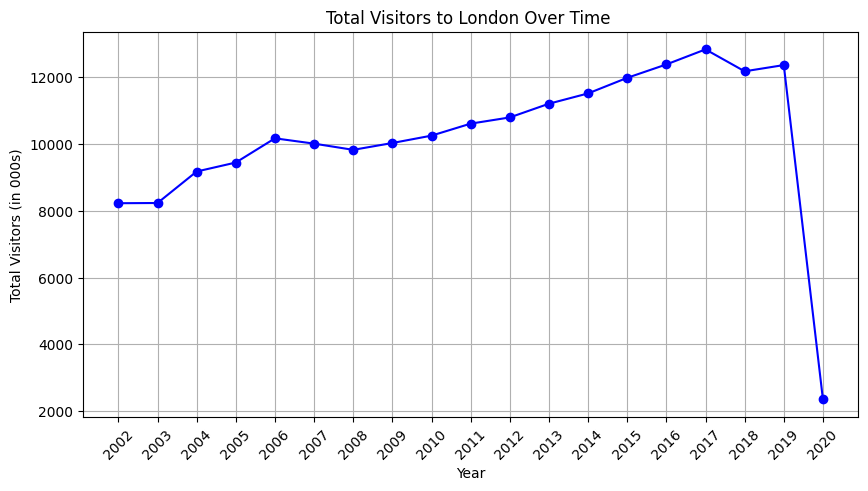

In [ ]:
# Improved: Total Visitors to London Over Time
plt.figure(figsize=(10, 5))
years = df.groupby("year")["visits_000s"].sum()

plt.plot(years.index, years.values, marker='o', linestyle='-', color='blue')
plt.xticks(years.index, rotation=45)
plt.title("Total Visitors to London Over Time ")
plt.xlabel("Year")
plt.ylabel("Total Visitors (in 000s)")
plt.grid(True)

# Show the  visualization
plt.show()


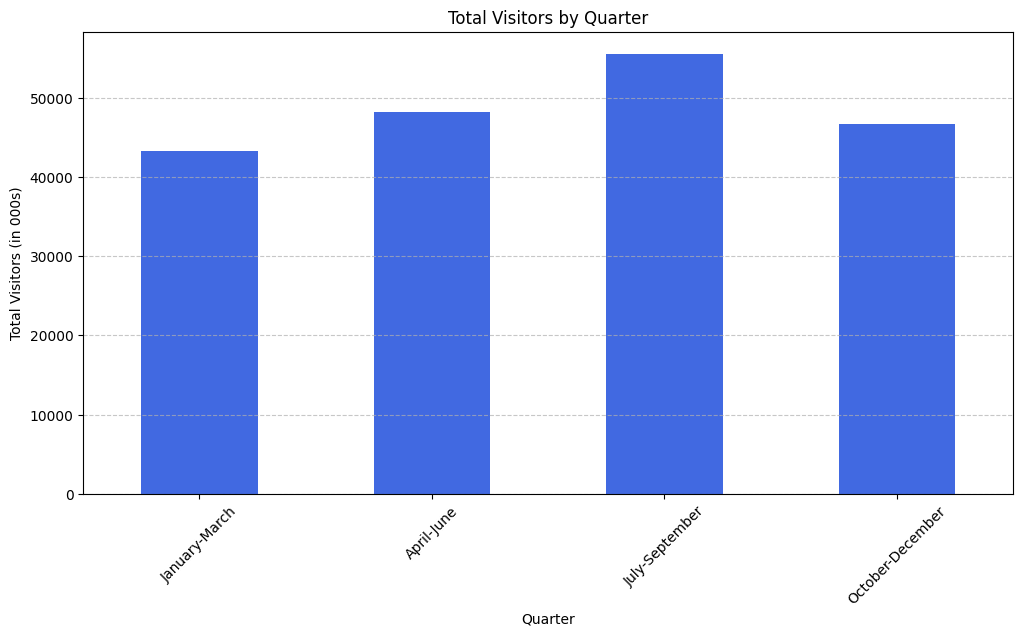

In [ ]:
#  Total Visitors by Quarter
quarter_order = ["January-March", "April-June", "July-September", "October-December"]
quarterly_visits = df.groupby("quarter", observed=False)["visits_000s"].sum().reindex(quarter_order)
plt.figure(figsize=(12, 6))
quarterly_visits.plot(kind="bar", color="royalblue")
plt.title("Total Visitors by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Visitors (in 000s)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the  visualization
plt.show()


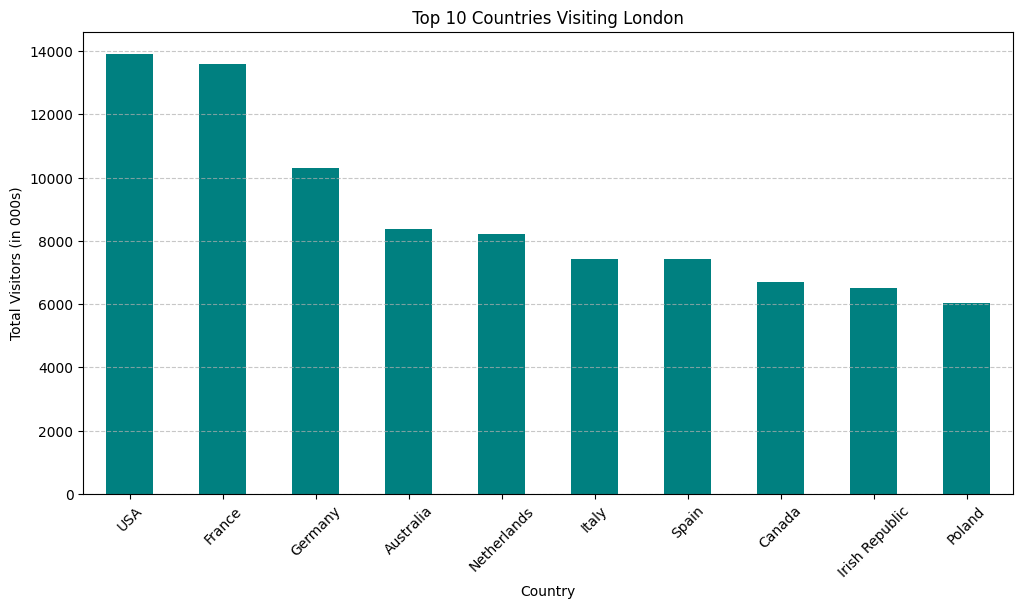

In [ ]:
# Top 10 Countries Visiting London
top_countries_fixed = df.groupby("market", observed=False)["visits_000s"].sum().nlargest(10)

# Generating the bar chart
plt.figure(figsize=(12, 6))
top_countries_fixed.plot(kind="bar", color="teal")
plt.title(" Top 10 Countries Visiting London ")
plt.xlabel("Country")
plt.ylabel("Total Visitors (in 000s)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the  visualization
plt.show()

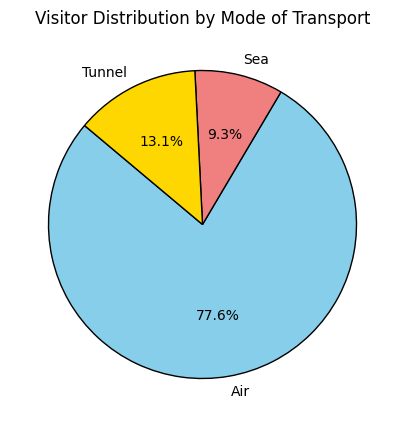

In [ ]:
#Visitor Distribution by Mode of Transport
plt.figure(figsize=(8, 5))
df.groupby("mode", observed=False)["visits_000s"].sum().plot(kind="pie", autopct='%1.1f%%',
    startangle=140, colors=["skyblue", "lightcoral", "gold"], wedgeprops={'edgecolor': 'black'})
plt.title("Visitor Distribution by Mode of Transport")
plt.ylabel("")

# Show the visualization
plt.show()


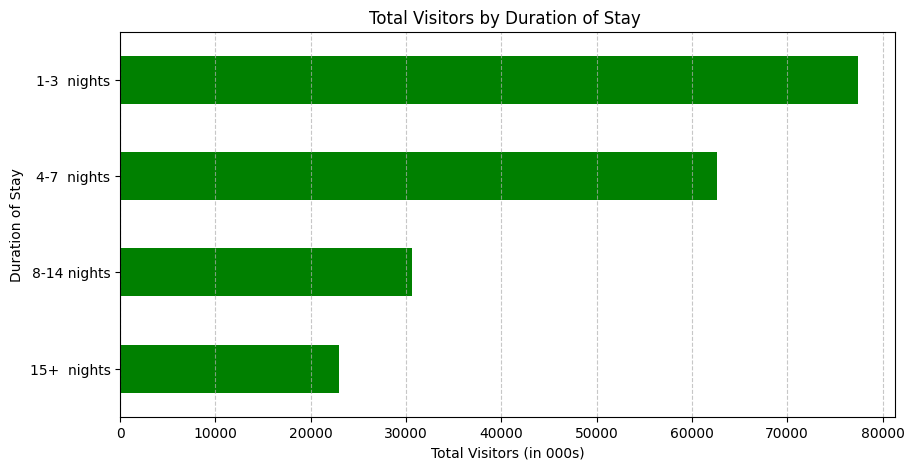

In [ ]:
#Total Visitors by Duration of Stay
plt.figure(figsize=(10, 5))
df.groupby("dur_stay", observed=False)["visits_000s"].sum().sort_values().plot(kind="barh", color="green")
plt.title("Total Visitors by Duration of Stay ")
plt.xlabel("Total Visitors (in 000s)")
plt.ylabel("Duration of Stay")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the graph
plt.show()


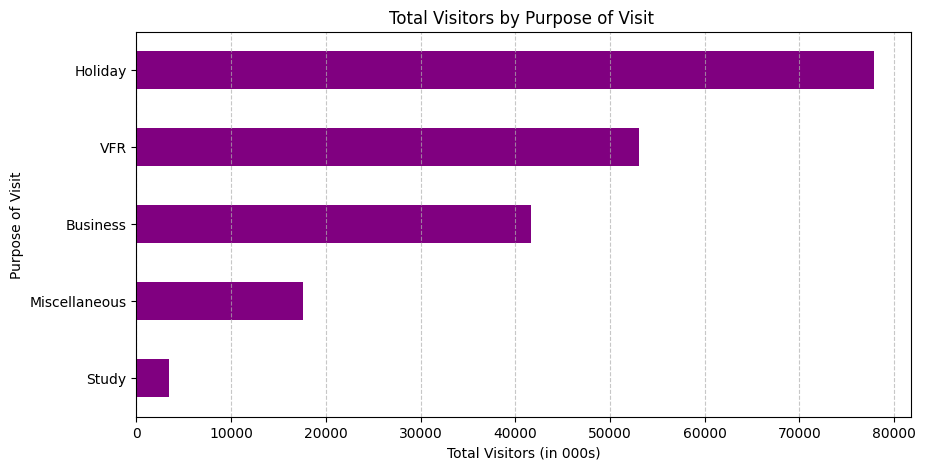

In [ ]:
#Total Visitors by Purpose of Visit
plt.figure(figsize=(10, 5))
df.groupby("purpose", observed=False)["visits_000s"].sum().sort_values().plot(kind="barh", color="purple")
plt.title("Total Visitors by Purpose of Visit ")
plt.xlabel("Total Visitors (in 000s)")
plt.ylabel("Purpose of Visit")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the graph
plt.show()


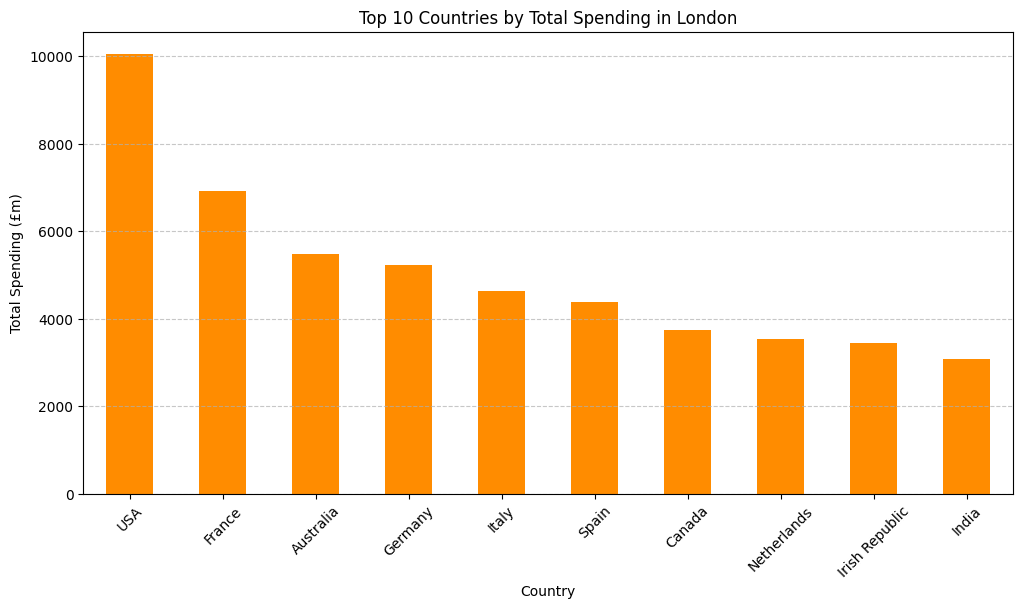

In [ ]:
 #Country-wise Spending Comparison (Top 10 Spending Countries)
top_spending_countries = df.groupby("market", observed=False)["spend_m"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_spending_countries.plot(kind="bar", color="darkorange")
plt.title("Top 10 Countries by Total Spending in London")
plt.xlabel("Country")
plt.ylabel("Total Spending (£m)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the visualization
plt.show()

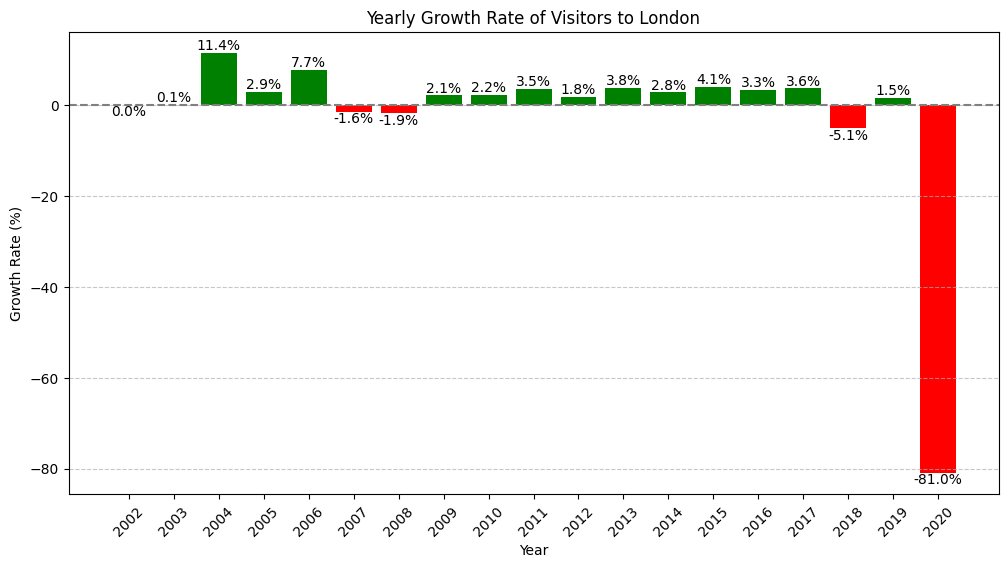

In [ ]:
# Yearly Growth Rate of Visitors to London
df["visits_000s"] = pd.to_numeric(df["visits_000s"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Calculate yearly visits and growth rate
yearly_visits = df.groupby("year", observed=False)["visits_000s"].sum().sort_index()
yearly_growth_rate = yearly_visits.pct_change() * 100

# Set the first year's growth rate to 0%
yearly_growth_rate.iloc[0] = 0

# Generate a clear and simple bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_growth_rate.index, yearly_growth_rate.values, color=['green' if x > 0 else 'red' for x in yearly_growth_rate.values])

# Add percentage labels directly above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%",
             ha='center', va='bottom' if bar.get_height() > 0 else 'top', fontsize=10, color='black')

# Formatting
plt.axhline(y=0, color='gray', linestyle='--')  # Baseline at 0%
plt.title("Yearly Growth Rate of Visitors to London")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.xticks(yearly_growth_rate.index, rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the graph
plt.show()


In [ ]:
# Load the cleaned dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the dataset
file_path = "/content/cleaned_dataset.csv"
df = pd.read_csv(file_path)


In [ ]:
# Select relevant numerical features for clustering
selected_features = df[["visits_000s", "spend_m", "nights_000s"]]

#Check for missing values and data types
print("Feature Info:")
print(selected_features.info())
print("\nFeature Statistics:")
print(selected_features.describe())

Feature Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   visits_000s  61462 non-null  float64
 1   spend_m      61462 non-null  float64
 2   nights_000s  61462 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB
None

Feature Statistics:
        visits_000s       spend_m   nights_000s
count  61462.000000  61462.000000  61462.000000
mean       3.150777      2.046550     20.444354
std        3.119319      2.272896     22.066634
min        0.000103      0.000000      0.000309
25%        0.822888      0.321693      3.901581
50%        1.797305      1.047351     10.676935
75%        4.416618      3.007542     29.483044
max        9.807213      7.036316     67.855238


In [ ]:
# Handle missing values (if any)
selected_features = selected_features.dropna()  # Removes rows with missing values

#Display first few rows of selected features
print("\nFirst 5 rows of Selected Features:")
print(selected_features.head())


First 5 rows of Selected Features:
   visits_000s   spend_m  nights_000s
0     3.572186  0.969138     6.954456
1     9.284226  2.399577    12.604959
2     0.877182  0.089833     2.153128
3     0.163874  0.010160     0.163874
4     1.648670  0.016789     1.650300


In [ ]:
# Apply StandardScaler to normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Convert scaled features back into a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_features, columns=["visits_scaled", "spend_scaled", "nights_scaled"])

In [ ]:
# Display first few rows of scaled features
print("\nFirst 5 rows of Scaled Features:")
print(scaled_df.head())

# Display summary statistics of scaled features
print("\nScaled Feature Statistics:")
print(scaled_df.describe())



First 5 rows of Scaled Features:
   visits_scaled  spend_scaled  nights_scaled
0       0.135098     -0.474030      -0.611331
1       1.966294      0.155321      -0.355263
2      -0.728881     -0.860899      -0.828915
3      -0.957558     -0.895952      -0.919064
4      -0.481554     -0.893036      -0.851702

Scaled Feature Statistics:
       visits_scaled  spend_scaled  nights_scaled
count   6.146200e+04  6.146200e+04   6.146200e+04
mean   -5.179186e-17 -1.257802e-16   7.768779e-17
std     1.000008e+00  1.000008e+00   1.000008e+00
min    -1.010060e+00 -9.004226e-01  -9.264762e-01
25%    -7.462872e-01 -7.588872e-01  -7.496797e-01
50%    -4.339034e-01 -4.396186e-01  -4.426365e-01
75%     4.058103e-01  4.228084e-01   4.096122e-01
max     2.133957e+00  2.195352e+00   2.148550e+00


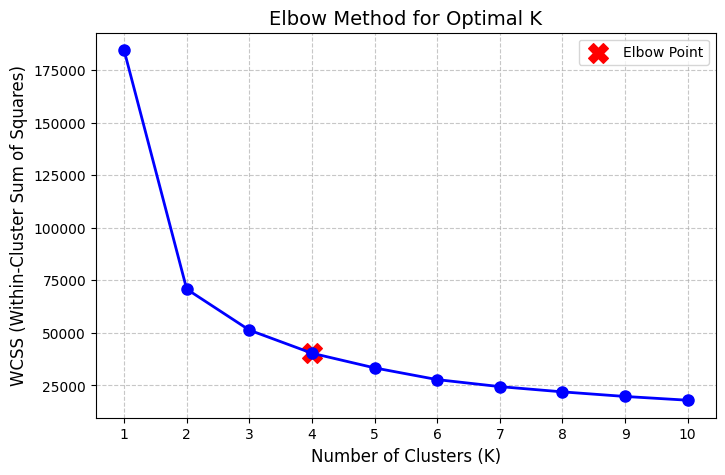

In [54]:


# Selecting the relevant features for clustering
features = ['visits_000s', 'spend_m', 'nights_000s']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
k_values = range(1, 11)  # Testing K values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Improved Elbow Method visualization
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', markersize=8, linewidth=2, color='b')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xticks(k_values, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating the elbow point for better clarity
elbow_point = 4  # Adjust if needed after visualization
plt.scatter(elbow_point, wcss[elbow_point-1], s=200, c='red', marker='X', label='Elbow Point')
plt.legend()

plt.show()







/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


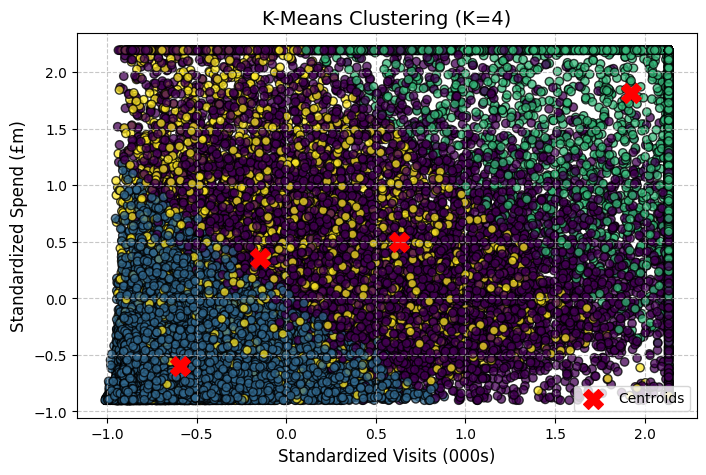

In [55]:
# Apply K-Means with the optimal number of clusters (K=4)
optimal_k = 4  # Confirmed from the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df['kmeans_cluster'] = cluster_labels

# Visualizing the clusters using the first two features (Visits & Spend)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Standardized Visits (000s)', fontsize=12)
plt.ylabel('Standardized Spend (£m)', fontsize=12)
plt.title(f'K-Means Clustering (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


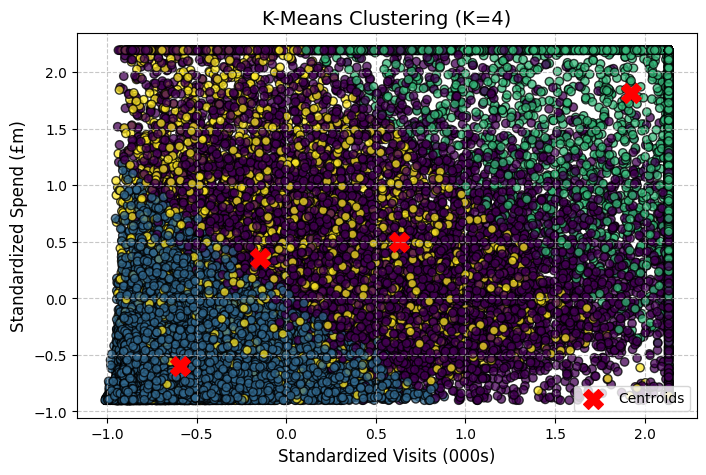

In [56]:


# Apply K-Means with the optimal number of clusters (K=4)
optimal_k = 4  # Confirmed from the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df['kmeans_cluster'] = cluster_labels

# Visualizing the clusters using the first two features (Visits & Spend)
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Standardized Visits (000s)', fontsize=12)
plt.ylabel('Standardized Spend (£m)', fontsize=12)
plt.title(f'K-Means Clustering (K={optimal_k})', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
